In [7]:
# поиск аномалий и выбрасов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib  inline
sns.set_style('darkgrid')
# клонирование репозитария
!git clone https://github.com/Lasttrader/DA_repo
# подгружаем данные
data = pd.read_csv('/content/DA_repo/boston_houses.csv', index_col = 0)
data.head()
data.columns.tolist()
data.LotFrontage.value_counts()


fatal: destination path 'DA_repo' already exists and is not an empty directory.


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [8]:
data.LotFrontage.nunique()

110

In [10]:
# смотрим пропуски в колонке и сумма
data.LotFrontage.isna().sum()

259

In [11]:
# всего переменных
data.LotFrontage.shape

(1460,)

In [13]:
# заполнить средние значения
data.LotFrontage = data.LotFrontage.fillna(data.LotFrontage.mean())
# смотрим пропуски в колонке LotFrontage
data.LotFrontage.isna().sum()

0

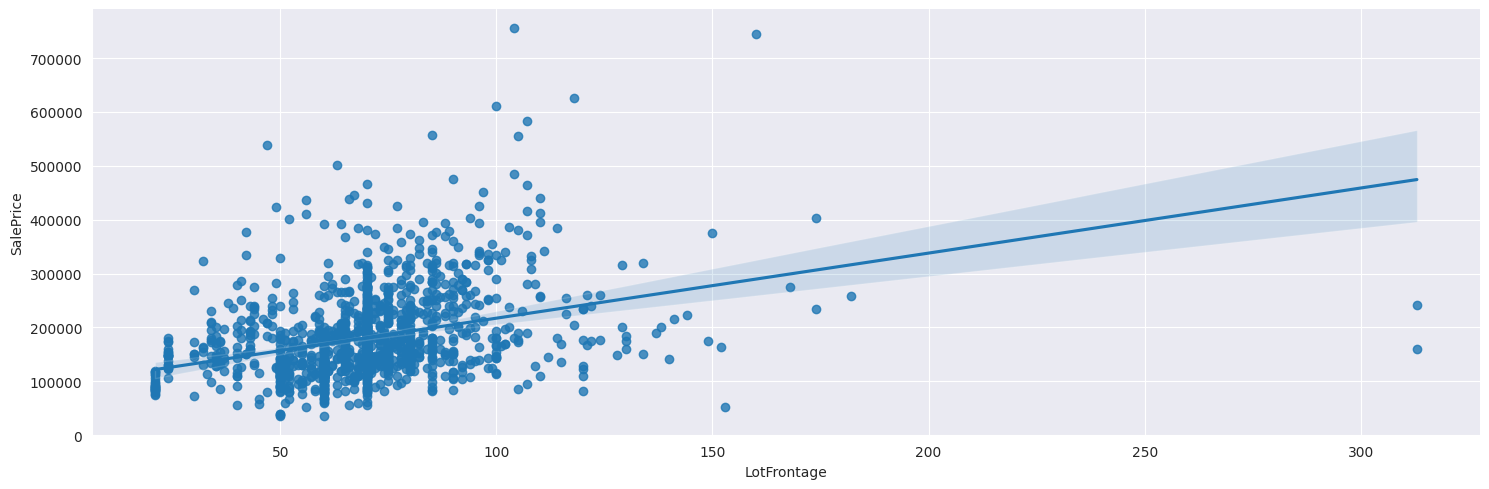

In [15]:
# зависимост стоимости дома от признаков LotFrontage
sns.lmplot(data = data, x = 'LotFrontage', y = 'SalePrice', aspect = 3, height = 5)
plt.show()

In [18]:
# разбивка ро ценовым группам
price_bins = data.SalePrice.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 , 1])
price_bins

0.0     34900.0
0.1    106475.0
0.2    124000.0
0.3    135500.0
0.4    147000.0
0.5    163000.0
0.6    179280.0
0.7    198620.0
0.8    230000.0
0.9    278000.0
1.0    755000.0
Name: SalePrice, dtype: float64

In [20]:
# разбиение по ценовым группам
data['Group_price'] = pd.cut(data.SalePrice, price_bins, labels = ['1', '2','3','4','5','6','7','8','9','10'], right=True, include_lowest=True)

In [2]:

sns.boxplot(data = data, y = 'LotFrontage', x = 'Group_price', hue = 'Group_price')
plt.show()

NameError: name 'sns' is not defined